# Random Forest Interpretation on the student-mat dataset

In [195]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
from fastai.imports import *
from fastai.structured import *

import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from pdpbox import pdp
from plotnine import *
from IPython.display import display

### Loading dataset

In [197]:
PATH = '../datafiles/other/student-mat.csv'

In [198]:
student_raw = pd.read_csv(PATH, sep=',', parse_dates=True)

In [199]:
student_raw.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [200]:
student_raw.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


###  Preprocessing

In [201]:
train_cats(student_raw)
student_raw

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [202]:
df, y, nas =  proc_df(student_raw, 'G3')

In [203]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,1,18,2,1,1,4,4,1,5,...,1,4,3,4,1,1,3,6,5,6
1,1,1,17,2,1,2,1,1,1,3,...,1,5,3,3,1,1,3,4,5,5
2,1,1,15,2,2,2,1,1,1,3,...,1,4,3,2,2,3,3,10,7,8
3,1,1,15,2,1,2,4,2,2,4,...,2,3,2,2,1,1,5,2,15,14
4,1,1,16,2,1,2,3,3,3,3,...,1,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,20,2,2,1,2,2,4,4,...,1,5,5,4,4,5,4,11,9,9
391,2,2,17,2,2,2,3,1,4,4,...,1,2,4,5,3,4,2,3,14,16
392,2,2,21,1,1,2,1,1,3,3,...,1,5,5,3,3,3,3,3,10,8
393,2,2,18,1,2,2,3,2,4,3,...,1,4,4,1,3,4,5,0,11,12


###  First model

In [204]:
model = RandomForestRegressor(n_jobs=-1, random_state=22).fit(df, y)
model.score(df, y)

0.9829039107467242

In [205]:
def split(dataset, num_of_splits):
    return dataset[num_of_splits: ].copy(), dataset[:num_of_splits].copy()
    

In [206]:
def score(model, df):
    mse = mean_absolute_error
    score = [mse(y, model.predict(df)), model.score(df, y),]
    if hasattr(model, 'oob_score_'):
        score.append(model.oob_score_)
    return score

In [207]:
model = RandomForestRegressor(n_estimators=50, max_features=.5, min_samples_leaf=10, oob_score=True).fit(df, y)
print(score(model, df))

[1.0164908903601413, 0.8901469275825776, 0.8454795969635958]


###  Feature Importance Plot

In [208]:
fi = rf_feat_importance(model, df)
fi[:]

,cols,imp
31,G2,0.580674
30,G1,0.245015
29,absences,0.109980
14,failures,0.022613
2,age,0.006494
27,Walc,0.003762
17,paid,0.003022
10,reason,0.002690
22,romantic,0.002674
9,Fjob,0.002638


In [209]:
drop = ['higher', 'Pstatus', 'school']
df = df.drop(drop, axis=1)
df

,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,guardian,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,18,2,1,4,4,1,5,1,2,...,1,4,3,4,1,1,3,6,5,6
1,1,17,2,1,1,1,1,3,1,1,...,1,5,3,3,1,1,3,4,5,5
2,1,15,2,2,1,1,1,3,3,2,...,1,4,3,2,2,3,3,10,7,8
3,1,15,2,1,4,2,2,4,2,2,...,2,3,2,2,1,1,5,2,15,14
4,1,16,2,1,3,3,3,3,2,1,...,1,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,20,2,2,2,2,4,4,1,3,...,1,5,5,4,4,5,4,11,9,9
391,2,17,2,2,3,1,4,4,1,2,...,1,2,4,5,3,4,2,3,14,16
392,2,21,1,1,1,1,3,3,1,3,...,1,5,5,3,3,3,3,3,10,8
393,2,18,1,2,3,2,4,3,1,2,...,1,4,4,1,3,4,5,0,11,12


In [210]:
model = RandomForestRegressor(n_estimators=50, max_features=.5, min_samples_leaf=10, oob_score=True).fit(df, y)
print(score(model, df))

[0.9648304513520557, 0.8916472662020134, 0.8575409313672879]


In [211]:
fi = rf_feat_importance(model, df)
fi[:]

,cols,imp
28,G2,0.531745
27,G1,0.319760
26,absences,0.092825
12,failures,0.021137
1,age,0.007591
24,Walc,0.004628
19,romantic,0.003090
16,activities,0.002971
15,paid,0.002289
5,Fedu,0.001772


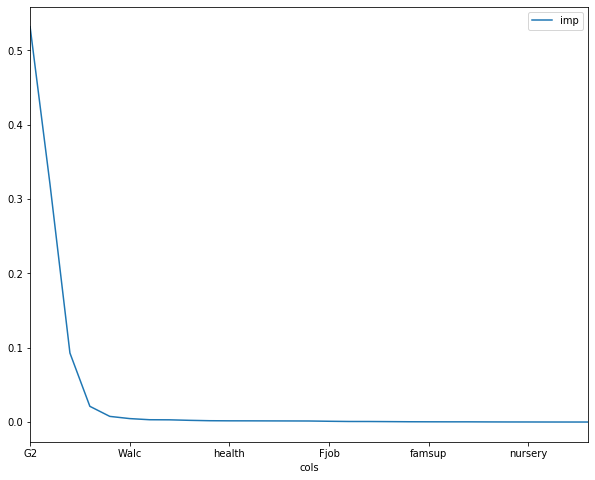

In [212]:
fi.plot('cols', 'imp',  figsize=(10,8))

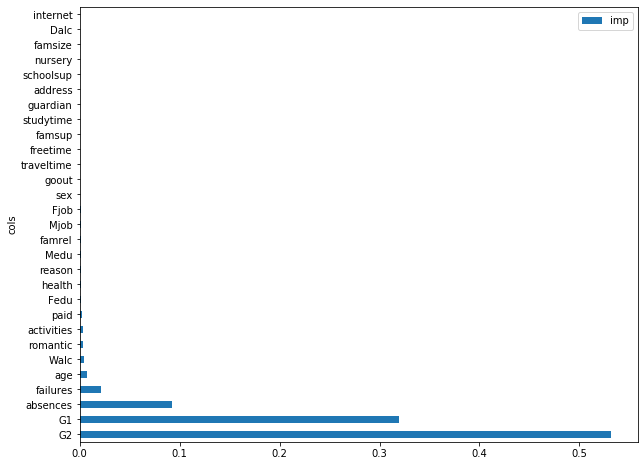

In [213]:
fi.plot('cols', 'imp', 'barh', figsize=(10,8))

In [214]:
to_keep = fi[fi.imp>0.01].cols
to_keep

28          G2
27          G1
26    absences
12    failures
Name: cols, dtype: object

In [215]:
df_keep = df[to_keep].copy()
df_keep

,G2,G1,absences,failures
0,6,5,6,0
1,5,5,4,0
2,8,7,10,3
3,14,15,2,0
4,10,6,4,0
...,...,...,...,...
390,9,9,11,2
391,16,14,3,0
392,8,10,3,3
393,12,11,0,0


In [216]:
model = RandomForestRegressor(n_estimators=100, max_features=None, min_samples_leaf=10, oob_score=True)
model.fit(df_keep, y)
print(score(model, df_keep))

[0.9038227223844808, 0.89267264118364, 0.8687593832137848]


In [226]:
draw_tree(model.estimators_[0], df_keep, precision=3)

NameError: name 'IPython' is not defined